# Eastern Washington Digital Equity

## Nicholas Tran, Juliana Reyes, Trevor Myers

# PCA - Method 1

jupyter nbconvert notebooks/pca_method2.ipynb --to slides --post serve --SlidesExporter.reveal_scroll=True

## Use PC1 As Index

## Use Correlation P Values for Feature Selection

## Create New Dataset w/ Removed Variables

## Use Stepwise Regression for Final Coefficients

## Prepare The Data

### Load The Libraries

In [19]:
library(tidyverse, quietly = TRUE) # data manipulation
library(psych, quietly = TRUE) # KMO
library(Hmisc, quietly = TRUE) # correlation matrix
library(leaps) # stepwise regression


### Get The Data

In [20]:
clean_data <- read.csv("../data/combined_data.csv")
data <- read.csv("../data/combined_data.csv")
head(data)


,NAME,GEOID,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Census Tract 9601, Asotin County, Washington",53003960100,1664,1569,1337,73942,12,58.00000,110.3274,41.78210,51.70445
2,"Census Tract 9602, Asotin County, Washington",53003960200,1872,1780,1352,72988,13,60.07692,145.7848,22.88731,24.62630
3,"Census Tract 9603, Asotin County, Washington",53003960300,1279,1156,396,38077,11,60.00000,173.4079,27.06202,29.98058
4,"Census Tract 9604, Asotin County, Washington",53003960400,941,805,647,38777,8,62.50000,127.6005,23.53829,22.16379
5,"Census Tract 9605, Asotin County, Washington",53003960500,1345,1198,635,42639,8,62.50000,192.4299,21.68565,21.66087
6,"Census Tract 9606, Asotin County, Washington",53003960600,1542,1392,909,53947,9,58.88889,151.0552,23.52123,26.18557


In [21]:
as.list(names(data))


[[1]]
[1] "NAME"

[[2]]
[1] "GEOID"

[[3]]
[1] "has_computer"

[[4]]
[1] "with_internet"

[[5]]
[1] "sixtyfive_and_older"

[[6]]
[1] "median_income"

[[7]]
[1] "number_providers"

[[8]]
[1] "mean_lowest_cost"

[[9]]
[1] "mean_d_mbps"

[[10]]
[1] "mean_u_mbps"

[[11]]
[1] "mean_lat_ms"

#### Remove Unnecessary Columns

In [22]:
data <- data %>% dplyr::select(-NAME, -GEOID)
head(data)


,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1664,1569,1337,73942,12,58.00000,110.3274,41.78210,51.70445
2,1872,1780,1352,72988,13,60.07692,145.7848,22.88731,24.62630
3,1279,1156,396,38077,11,60.00000,173.4079,27.06202,29.98058
4,941,805,647,38777,8,62.50000,127.6005,23.53829,22.16379
5,1345,1198,635,42639,8,62.50000,192.4299,21.68565,21.66087
6,1542,1392,909,53947,9,58.88889,151.0552,23.52123,26.18557


#### Check Data To See If We Can Use Dimensionality Reduction Techniques

In [23]:
KMO(data)


Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data)
Overall MSA =  0.66
MSA for each item = 
       has_computer       with_internet sixtyfive_and_older       median_income 
               0.60                0.61                0.87                0.89 
   number_providers    mean_lowest_cost         mean_d_mbps         mean_u_mbps 
               0.66                0.56                0.68                0.64 
        mean_lat_ms 
               0.69 

#### Standardize The Data

In [24]:
scaled_data <- scale(data)


In [25]:
head(scaled_data)


has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
0.50245011,0.5167430,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288
0.88153598,0.9194434,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598
-0.19922325,-0.2714809,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741
-0.81523778,-0.9413759,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794
-0.07893639,-0.1913226,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584
0.28010167,0.1789328,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433


### Examine The Data

#### Variance

In [26]:
var(scaled_data)


,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
has_computer,1.0000000,0.9894358,0.63073622,0.16291986,-0.11586967,0.10884185,0.30554032,0.19648189,-0.20130674
with_internet,0.9894358,1.0000000,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,0.19906151,-0.23671663
sixtyfive_and_older,0.6307362,0.6252921,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,-0.16920740,0.10201766
median_income,0.1629199,0.1604089,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,-0.01815921,0.05852071
number_providers,-0.1158697,-0.1288266,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,-0.01627282,0.44680246
mean_lowest_cost,0.1088418,0.1364058,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,0.08436356,-0.18109139
mean_d_mbps,0.3055403,0.3450734,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,0.40439966,-0.83156103
mean_u_mbps,0.1964819,0.1990615,-0.16920740,-0.01815921,-0.01627282,0.08436356,0.40439966,1.00000000,-0.42114628
mean_lat_ms,-0.2013067,-0.2367166,0.10201766,0.05852071,0.44680246,-0.18109139,-0.83156103,-0.42114628,1.00000000


#### Correlation

In [27]:
cor(scaled_data)

,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
has_computer,1.0000000,0.9894358,0.63073622,0.16291986,-0.11586967,0.10884185,0.30554032,0.19648189,-0.20130674
with_internet,0.9894358,1.0000000,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,0.19906151,-0.23671663
sixtyfive_and_older,0.6307362,0.6252921,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,-0.16920740,0.10201766
median_income,0.1629199,0.1604089,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,-0.01815921,0.05852071
number_providers,-0.1158697,-0.1288266,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,-0.01627282,0.44680246
mean_lowest_cost,0.1088418,0.1364058,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,0.08436356,-0.18109139
mean_d_mbps,0.3055403,0.3450734,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,0.40439966,-0.83156103
mean_u_mbps,0.1964819,0.1990615,-0.16920740,-0.01815921,-0.01627282,0.08436356,0.40439966,1.00000000,-0.42114628
mean_lat_ms,-0.2013067,-0.2367166,0.10201766,0.05852071,0.44680246,-0.18109139,-0.83156103,-0.42114628,1.00000000


## Create The Index

### Apply PCA

In [107]:
# pca_data <- prcomp(data, scale = TRUE, center = TRUE)
pca_data <- prcomp(data, scale = TRUE, center = TRUE)

# disable scientific notation
options(scipen = 999)


### Summary

In [108]:
summary(pca_data)$importance


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,1.743773,1.464435,1.065625,0.9701836,0.8955194,0.6650307,0.5707461,0.3984125,0.09575389
Proportion of Variance,0.337860,0.238290,0.126170,0.1045800,0.0891100,0.0491400,0.0361900,0.0176400,0.00102000
Cumulative Proportion,0.337860,0.576150,0.702320,0.8069000,0.8960100,0.9451500,0.9813400,0.9989800,1.00000000


### Eigenvectors

In [109]:
eigenvectors <- pca_data$rotation

eigenvectors


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
has_computer,-0.45993302,0.3645542,-0.06581007,0.10300466,-0.0020124875,-0.2024725,0.317672634,-0.092083249,0.700161815
with_internet,-0.47267948,0.3461413,-0.05423008,0.09969522,0.0007207665,-0.1493425,0.331599084,-0.063379248,-0.712461740
sixtyfive_and_older,-0.24045500,0.5093232,0.16540539,0.11811830,-0.1113232689,0.2892430,-0.734696590,0.074997004,0.001554206
median_income,-0.06011374,0.2171501,-0.11890688,-0.94529010,0.1858748525,0.0826222,-0.003009265,0.011320667,0.002619315
number_providers,0.26786214,0.2950848,-0.50605500,0.22386285,0.2792463404,0.6281214,0.247267641,0.032340077,0.016323203
mean_lowest_cost,-0.18976570,-0.1367443,0.58920624,0.06984364,0.7275385176,0.2341803,0.093370699,0.001803882,0.019333680
mean_d_mbps,-0.43037469,-0.3465275,-0.08730473,-0.04847258,-0.2182100276,0.3113622,0.103093440,0.726855033,0.034872271
mean_u_mbps,-0.24523568,-0.2388443,-0.57095208,0.10377848,0.5079292254,-0.3474239,-0.406960585,0.039015688,-0.014900853
mean_lat_ms,0.38791675,0.3972660,0.11985947,0.06175215,0.2003860575,-0.4233051,0.056863540,0.671462166,-0.009169267


### Eigenvalues

In [31]:
eigenvalues <- pca_data$sdev^2

as.list(eigenvalues)


[[1]]
[1] 3.040746

[[2]]
[1] 2.144569

[[3]]
[1] 1.135556

[[4]]
[1] 0.9412562

[[5]]
[1] 0.801955

[[6]]
[1] 0.4422659

[[7]]
[1] 0.3257512

[[8]]
[1] 0.1587326

[[9]]
[1] 0.009168808

### Principal Component Scores

In [32]:
principal_components <- -pca_data$x

head(principal_components)


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-0.31980931,-2.814248406,0.6018283,-0.82050064,-0.71877381,-0.5765536,1.0631272,-0.1778576,0.040333441
0.55922699,-2.676824146,0.3277764,-0.88302832,-0.57122993,-1.8527420,0.4059791,0.4810874,0.004425048
-0.88731815,0.009439822,0.2849808,-0.08700092,-0.67471195,-0.6740471,-0.8132396,0.1452019,-0.072451920
-0.87133260,0.538393916,-1.1898814,0.24680822,-0.66895624,-0.3947503,0.5158786,0.6906138,-0.095803662
0.13454734,0.288009090,-1.0646210,0.14663718,-0.46475567,-0.3957613,-0.1006092,0.2718971,-0.104848567
0.07000694,-0.945588616,-0.3217633,-0.11304798,0.06951643,-0.3172342,0.3396357,0.4516868,-0.061567426


### Use The Scores From PC1 As Index

#### PC1 Eigenvector

In [33]:
as.list(eigenvectors[, 1])


$has_computer
[1] -0.459933

$with_internet
[1] -0.4726795

$sixtyfive_and_older
[1] -0.240455

$median_income
[1] -0.06011374

$number_providers
[1] 0.2678621

$mean_lowest_cost
[1] -0.1897657

$mean_d_mbps
[1] -0.4303747

$mean_u_mbps
[1] -0.2452357

$mean_lat_ms
[1] 0.3879167

#### Multiply PC1 by Scaled Data

In [34]:
head(scaled_data %*% eigenvectors[, 1])


0.31980931
-0.55922699
0.88731815
0.87133260
-0.13454734
-0.07000694


#### We See That The Scores In PC1 Are The Same

In [35]:
principal_components %>%
    as.data.frame() %>%
    dplyr::select(PC1) %>%
    head()


,PC1
,<dbl>
1,-0.31980931
2,0.55922699
3,-0.88731815
4,-0.87133260
5,0.13454734
6,0.07000694


#### Append to DataFrame

In [36]:
index_data <- scaled_data %>%
    as.data.frame() %>%
    mutate(index = as.data.frame(principal_components)[, 1])

head(index_data)


,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.50245011,0.5167430,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,-0.31980931
2,0.88153598,0.9194434,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,0.55922699
3,-0.19922325,-0.2714809,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-0.88731815
4,-0.81523778,-0.9413759,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-0.87133260
5,-0.07893639,-0.1913226,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,0.13454734
6,0.28010167,0.1789328,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,0.07000694


### Test The Index

#### We remove variables with a p value greater than alpha of .05

In [37]:
as.list(rcorr(as.matrix(index_data), type = "pearson")$P[, ncol(index_data)])


$has_computer
[1] 0

$with_internet
[1] 0

$sixtyfive_and_older
[1] 0.00000000346637

$median_income
[1] 0.1578852

$number_providers
[1] 0.00000000002639

$mean_lowest_cost
[1] 0.000004754581

$mean_d_mbps
[1] 0

$mean_u_mbps
[1] 0.000000001561876

$mean_lat_ms
[1] 0

$index
[1] NA

In [38]:
rcorr(as.matrix(index_data), type = "pearson")$P


,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,NA,0.000000000000,0.00000000000000,0.02755381,0.118292436762501785,0.142469388878,0.000025995933165657,0.007680971891602,0.0062836851041634,0.000000000000000
with_internet,0.00000000000,NA,0.00000000000000,0.03006990,0.082203264746717686,0.065587150157,0.000001719724394889,0.006902898453880,0.0012541075067722,0.000000000000000
sixtyfive_and_older,0.00000000000,0.000000000000,NA,0.04477147,0.476702946467304045,0.497188268940,0.569411922064836595,0.022030156319832,0.1693793288053422,0.000000003466370
median_income,0.02755381191,0.030069898204,0.04477147246482,NA,0.767570871280282230,0.469668921788,0.521089097196837159,0.807238517875172,0.4313383103711321,0.157885201635410
number_providers,0.11829243676,0.082203264747,0.47670294646730,0.76757087,NA,0.000005261423,0.000000000006029399,0.826929938720940,0.0000000002296336,0.000000000026390
mean_lowest_cost,0.14246938888,0.065587150157,0.49718826894047,0.46966892,0.000005261422731273,NA,0.007630242115620689,0.256184957503358,0.0141555670114635,0.000004754580690
mean_d_mbps,0.00002599593,0.000001719724,0.56941192206484,0.52108910,0.000000000006029399,0.007630242116,NA,0.000000013665493,0.0000000000000000,0.000000000000000
mean_u_mbps,0.00768097189,0.006902898454,0.02203015631983,0.80723852,0.826929938720939894,0.256184957503,0.000000013665493181,NA,0.0000000029104892,0.000000001561876
mean_lat_ms,0.00628368510,0.001254107507,0.16937932880534,0.43133831,0.000000000229633645,0.014155567011,0.000000000000000000,0.000000002910489,NA,0.000000000000000
index,0.00000000000,0.000000000000,0.00000000346637,0.15788520,0.000000000026390001,0.000004754581,0.000000000000000000,0.000000001561876,0.0000000000000000,NA


In [39]:
rcorr(as.matrix(index_data), type = "pearson")$r


,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,1.0000000,0.9894358,0.63073622,0.16291986,-0.11586967,0.10884185,0.30554032,0.19648189,-0.20130674,0.8020190
with_internet,0.9894358,1.0000000,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,0.19906151,-0.23671663,0.8242459
sixtyfive_and_older,0.6307362,0.6252921,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,-0.16920740,0.10201766,0.4192990
median_income,0.1629199,0.1604089,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,-0.01815921,0.05852071,0.1048247
number_providers,-0.1158697,-0.1288266,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,-0.01627282,0.44680246,-0.4670909
mean_lowest_cost,0.1088418,0.1364058,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,0.08436356,-0.18109139,0.3309084
mean_d_mbps,0.3055403,0.3450734,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,0.40439966,-0.83156103,0.7504760
mean_u_mbps,0.1964819,0.1990615,-0.16920740,-0.01815921,-0.01627282,0.08436356,0.40439966,1.00000000,-0.42114628,0.4276355
mean_lat_ms,-0.2013067,-0.2367166,0.10201766,0.05852071,0.44680246,-0.18109139,-0.83156103,-0.42114628,1.00000000,-0.6764389
index,0.8020190,0.8242459,0.41929904,0.10482475,-0.46709089,0.33090839,0.75047596,0.42763546,-0.67643892,1.0000000


In [40]:
data1.2 <- data %>% dplyr::select(-median_income)
scaled_data1.2 <- scale(data1.2)

pca_data1.2 <- prcomp(data1.2, scale = TRUE, center = TRUE)
eigenvectors1.2 <- -pca_data1.2$rotation
eigenvalues1.2 <- pca_data1.2$sdev^2

index_col <- as.data.frame(-pca_data1.2$x)[, 1]

index_data1.2 <- scaled_data %>%
    as.data.frame() %>%
    mutate(index = as.data.frame(-pca_data1.2$x)[, 1])


#### Check To See if The Data Are Good

In [41]:
cortest.bartlett(cov(scaled_data1.2), 183)


$chisq
[1] 1196.833

$p.value
[1] 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002675389

$df
[1] 28

## Calculate The Final Coefficients with Stepwise Regression

### Create Models

In [42]:
forward <- regsubsets(index_col ~ ., as.data.frame(scaled_data), method = "forward")
results <- summary(forward)

results


Subset selection object
Call: regsubsets.formula(index_col ~ ., as.data.frame(scaled_data), 
    method = "forward")
9 Variables  (and intercept)
                    Forced in Forced out
has_computer            FALSE      FALSE
with_internet           FALSE      FALSE
sixtyfive_and_older     FALSE      FALSE
median_income           FALSE      FALSE
number_providers        FALSE      FALSE
mean_lowest_cost        FALSE      FALSE
mean_d_mbps             FALSE      FALSE
mean_u_mbps             FALSE      FALSE
mean_lat_ms             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         has_computer with_internet sixtyfive_and_older median_income
1  ( 1 ) " "          "*"           " "                 " "          
2  ( 1 ) " "          "*"           " "                 " "          
3  ( 1 ) " "          "*"           " "                 " "          
4  ( 1 ) " "          "*"           " "                 " "          
5  ( 1 ) " "          "*"         

In [43]:
which.max(results$adjr2)
which.min(results$bic)
which.max(results$rsq)

[1] 8

[1] 8

[1] 8

In [44]:
as.list(coef(forward, 7))

$`(Intercept)`
[1] 0.0000000000000006951904

$with_internet
[1] 0.9195448

$sixtyfive_and_older
[1] 0.2380701

$number_providers
[1] -0.2831975

$mean_lowest_cost
[1] 0.1814079

$mean_d_mbps
[1] 0.4185268

$mean_u_mbps
[1] 0.2606352

$mean_lat_ms
[1] -0.3881886

In [45]:
model1.1 <- lm(
    index_col ~
        with_internet +
        sixtyfive_and_older +
        number_providers +
        mean_lowest_cost +
        mean_d_mbps +
        mean_u_mbps +
        mean_lat_ms,
    as.data.frame(scaled_data)
)
summary(model1.1)



Call:
lm(formula = index_col ~ with_internet + sixtyfive_and_older + 
    number_providers + mean_lowest_cost + mean_d_mbps + mean_u_mbps + 
    mean_lat_ms, data = as.data.frame(scaled_data))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.117888 -0.035833 -0.009977  0.025538  0.290854 

Coefficients:
                                    Estimate               Std. Error t value
(Intercept)         -0.000000000000000004469  0.004658053117695023539    0.00
with_internet        0.919544773016861660686  0.007061894622457788422  130.21
sixtyfive_and_older  0.238070099459294026722  0.006715512539211152161   35.45
number_providers    -0.283197483084216827809  0.005769324662002943936  -49.09
mean_lowest_cost     0.181407920252269649897  0.004986765846081950802   36.38
mean_d_mbps          0.418526801525845260077  0.009104631669045097284   45.97
mean_u_mbps          0.260635201000310623431  0.005619697047219966539   46.38
mean_lat_ms         -0.388188553080966003428  0.00866

### Choose Model Based On Diminishing Adj R2

## We will end up using coefficients using another PCA method

# PCA Method 2

## Determine Amount of PCs To Use

## Variable Selection Based on sqrt(1/n)

## Create Index Using PCs

## Determine Number of PCs To Use

### Explain At Least 70% of The Data

In [46]:
importance <- summary(pca_data)$importance %>%
    as.data.frame() %>%
    t()
importance


,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.74377344,0.33786,0.33786
PC2,1.46443455,0.23829,0.57615
PC3,1.06562477,0.12617,0.70232
PC4,0.97018357,0.10458,0.80690
PC5,0.89551939,0.08911,0.89601
PC6,0.66503071,0.04914,0.94515
PC7,0.57074614,0.03619,0.98134
PC8,0.39841255,0.01764,0.99898
PC9,0.09575389,0.00102,1.00000


In [47]:
percent_explained <- data.frame(
    PC = paste0("PC", 1:9),
    variance_explained = (eigenvalues / sum(eigenvalues)),
    total_percent = cumsum((eigenvalues / sum(eigenvalues)))
)
percent_explained


PC,variance_explained,total_percent
<chr>,<dbl>,<dbl>
PC1,0.337860644,0.3378606
PC2,0.238285395,0.5761460
PC3,0.126172905,0.7023189
PC4,0.104584017,0.8069030
PC5,0.089106109,0.8960091
PC6,0.049140650,0.9451497
PC7,0.036194572,0.9813443
PC8,0.017636951,0.9989812
PC9,0.001018756,1.0000000


### This method suggests 3 PCs

### Number of Eigenvalues Over 1

In [48]:
as.list(eigenvalues)


[[1]]
[1] 3.040746

[[2]]
[1] 2.144569

[[3]]
[1] 1.135556

[[4]]
[1] 0.9412562

[[5]]
[1] 0.801955

[[6]]
[1] 0.4422659

[[7]]
[1] 0.3257512

[[8]]
[1] 0.1587326

[[9]]
[1] 0.009168808

### There are 3

### Scree Plot

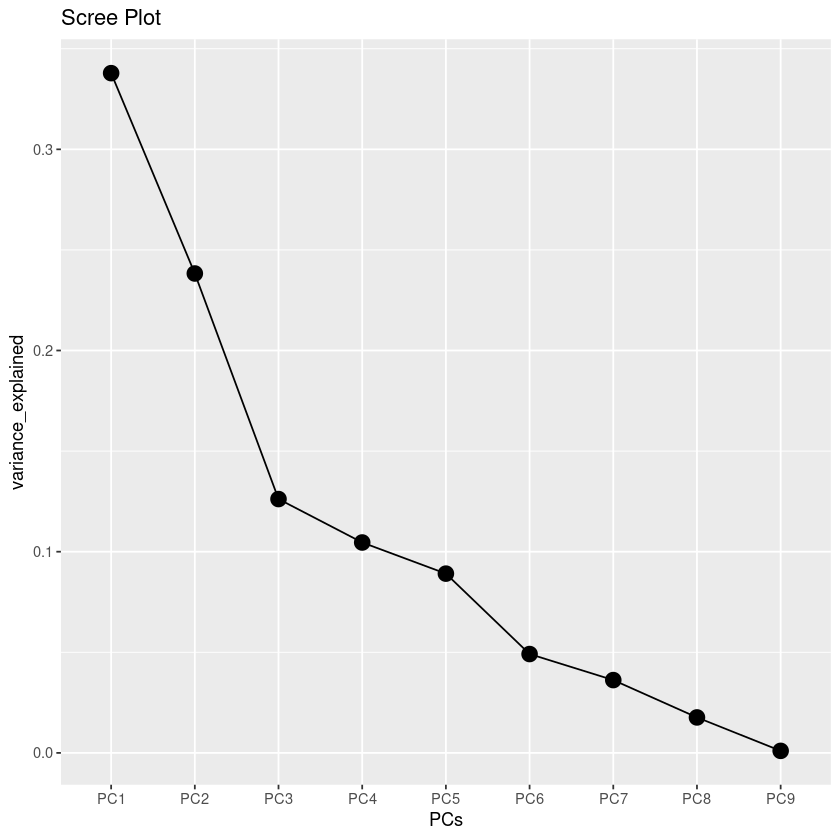

In [49]:
percent_explained %>%
    ggplot(aes(x = factor(PC, level = c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9")), y = variance_explained, group = 1, )) +
    geom_point(size = 4) +
    geom_line() +
    ggtitle("Scree Plot") +
    xlab("PCs")


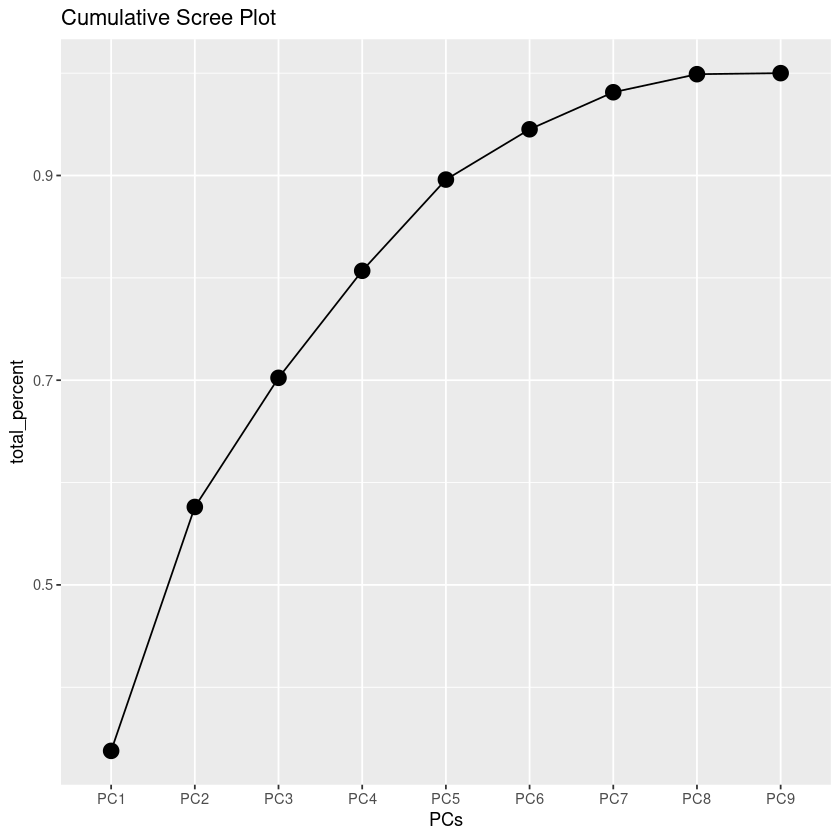

In [50]:
percent_explained %>%
    ggplot(aes(x = factor(PC, level = c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9")), y = total_percent, group = 1, )) +
    geom_point(size = 4) +
    geom_line() +
    ggtitle("Cumulative Scree Plot") +
    xlab("PCs")


### We'll use 3

## Feature Selection

### Remove Variables That Don't Exceed sqrt(1/n) in PC 1-3

In [51]:
sqrt(1 / 9)

[1] 0.3333333

In [52]:
eigenvectors[, 1:3]

,PC1,PC2,PC3
has_computer,-0.45993302,0.3645542,-0.06581007
with_internet,-0.47267948,0.3461413,-0.05423008
sixtyfive_and_older,-0.24045500,0.5093232,0.16540539
median_income,-0.06011374,0.2171501,-0.11890688
number_providers,0.26786214,0.2950848,-0.50605500
mean_lowest_cost,-0.18976570,-0.1367443,0.58920624
mean_d_mbps,-0.43037469,-0.3465275,-0.08730473
mean_u_mbps,-0.24523568,-0.2388443,-0.57095208
mean_lat_ms,0.38791675,0.3972660,0.11985947


### Remove median_income And Redo PCA

In [53]:
data2.2 <- data %>% dplyr::select(-median_income)
scaled_data2.2 <- scale(data2.2)
pca_data2.2 <- prcomp(data2.2, scale = TRUE, center = TRUE)
eigenvectors2.2 <- -pca_data2.2$rotation
eigenvalues2.2 <- pca_data2.2$sdev^2


## Create The Index

### Multiply Eigenvectors By Eigenvalues To Get Weights

In [54]:
weights <- eigenvectors2.2[, 1:3]

for (i in 1:ncol(weights)) {
    weights[i, ] <- weights[i, ] * eigenvalues2.2[i]
}


In [86]:
data

has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1664,1569,1337,73942,12,58.00000,110.3274,41.78210,51.70445
1872,1780,1352,72988,13,60.07692,145.7848,22.88731,24.62630
1279,1156,396,38077,11,60.00000,173.4079,27.06202,29.98058
941,805,647,38777,8,62.50000,127.6005,23.53829,22.16379
1345,1198,635,42639,8,62.50000,192.4299,21.68565,21.66087
1542,1392,909,53947,9,58.88889,151.0552,23.52123,26.18557
1179,1179,334,36981,7,62.71429,268.8225,22.46620,14.43662
570,515,97,40476,8,61.12500,304.6950,73.52632,10.17647
1026,975,302,35778,8,61.12500,267.8514,23.15267,14.22414


In [83]:
eigenvalues

[1] 3.040745797 2.144568556 1.135556147 0.941256152 0.801954981 0.442265850
[7] 0.325751151 0.158732556 0.009168808

In [55]:
weights


,PC1,PC2,PC3
has_computer,1.3781844,-1.1700233,0.24552823
with_internet,0.9755071,-0.7664853,0.14365837
sixtyfive_and_older,0.2635078,-0.6016760,-0.16543816
number_providers,-0.2727747,-0.2963657,0.52529656
mean_lowest_cost,0.1934170,0.1266271,-0.58752257
mean_d_mbps,0.4369824,0.3411832,0.08107499
mean_u_mbps,0.2492243,0.2400401,0.57210681
mean_lat_ms,-0.3951587,-0.3953091,-0.11124764


### Sum The Weights

In [56]:
weights <- weights %>%
    as.data.frame() %>%
    transmute(weight = PC1 + PC2 + PC3)

weights


,weight
,<dbl>
has_computer,0.45368933
with_internet,0.35268022
sixtyfive_and_older,-0.50360634
number_providers,-0.04384384
mean_lowest_cost,-0.26747852
mean_d_mbps,0.85924065
mean_u_mbps,1.06137118
mean_lat_ms,-0.90171551


### Multiply Standardized Data By Weights

In [57]:
index_data2 <- scaled_data2.2 %>%
        as.data.frame() %>%
        mutate(index = (scaled_data2.2 %*% as.matrix(weights)))

head(index_data2)


,has_computer,with_internet,sixtyfive_and_older,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
1,0.50245011,0.5167430,2.23493253,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,-2.4143862
2,0.88153598,0.9194434,2.28240921,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,-1.5025430
3,-0.19922325,-0.2714809,-0.74343819,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-0.6294349
4,-0.81523778,-0.9413759,0.05100501,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-1.9323299
5,-0.07893639,-0.1913226,0.01302366,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,-0.7089533
6,0.28010167,0.1789328,0.88026444,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,-1.1405124


## Check Reliability

In [58]:
library(ltm) # cronbach.alpha
cronbach.alpha(index_data2)


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: msm

Loading required package: polycor


Attaching package: ‘polycor’


The following object is masked from ‘package:psych’:

    polyserial



Attaching package: ‘ltm’


The following object is masked from ‘package:psych’:

    factor.scores





Cronbach's alpha for the 'index_data2' data-set

Items: 9
Sample units: 183
alpha: 0.45


We cannot use this method because the cronbach alpha of .45 is less than .7 - suggesting that the index is not reliable

# PCA - Method 3

## Create Index Using Method 2

## Feature Selection Using Method 1

## Stepwise Regression For Final Coefficients

## Create The Index

In [111]:
weights3 <- eigenvectors[, 1:3]

for (i in 1:ncol(weights3)) {
    weights3[i, ] <- weights3[i, ] * eigenvalues[i]
}
# weights3 <- weights3 %>%
#     as.data.frame() %>%
#     transmute(weight = PC1 + PC2 + PC3)
weights3


,PC1,PC2,PC3
has_computer,-1.39853938,1.1085166,-0.20011170
with_internet,-1.01369355,0.7423236,-0.11630012
sixtyfive_and_older,-0.27305015,0.5783651,0.18782710
median_income,-0.06011374,0.2171501,-0.11890688
number_providers,0.26786214,0.2950848,-0.50605500
mean_lowest_cost,-0.18976570,-0.1367443,0.58920624
mean_d_mbps,-0.43037469,-0.3465275,-0.08730473
mean_u_mbps,-0.24523568,-0.2388443,-0.57095208
mean_lat_ms,0.38791675,0.3972660,0.11985947


### Create The Index

In [60]:
index_data3 <- scaled_data %>%
    as.data.frame() %>%
    mutate(index = scaled_data %*% as.matrix(weights3))

head(index_data3)


,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
1,0.50245011,0.5167430,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,2.391603
2,0.88153598,0.9194434,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,1.443971
3,-0.19922325,-0.2714809,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,0.670836
4,-0.81523778,-0.9413759,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,1.988764
5,-0.07893639,-0.1913226,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,0.708382
6,0.28010167,0.1789328,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,1.120005


### Check The Index

In [61]:
as.list(rcorr(as.matrix(index_data3), type = "pearson")$P[, ncol(index_data3)])


$has_computer
[1] 0.0000000006449805

$with_internet
[1] 0.00000000005594192

$sixtyfive_and_older
[1] 0.1798263

$median_income
[1] 0.7301549

$number_providers
[1] 0.00000164362

$mean_lowest_cost
[1] 0.1942755

$mean_d_mbps
[1] 0

$mean_u_mbps
[1] 0

$mean_lat_ms
[1] 0

$index
[1] NA

In [62]:
rcorr(as.matrix(index_data3), type = "pearson")$P


,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,NA,0.00000000000000000,0.00000000,0.02755381,0.118292436762501785,0.142469388878,0.000025995933165657,0.007680971891602,0.0062836851041634,0.00000000064498051
with_internet,0.0000000000000000,NA,0.00000000,0.03006990,0.082203264746717686,0.065587150157,0.000001719724394889,0.006902898453880,0.0012541075067722,0.00000000005594192
sixtyfive_and_older,0.0000000000000000,0.00000000000000000,NA,0.04477147,0.476702946467304045,0.497188268940,0.569411922064836595,0.022030156319832,0.1693793288053422,0.17982632188830716
median_income,0.0275538119084824,0.03006989820441319,0.04477147,NA,0.767570871280282230,0.469668921788,0.521089097196837159,0.807238517875172,0.4313383103711321,0.73015494177059215
number_providers,0.1182924367625018,0.08220326474671769,0.47670295,0.76757087,NA,0.000005261423,0.000000000006029399,0.826929938720940,0.0000000002296336,0.00000164362034560
mean_lowest_cost,0.1424693888777973,0.06558715015738903,0.49718827,0.46966892,0.000005261422731273,NA,0.007630242115620689,0.256184957503358,0.0141555670114635,0.19427548221607838
mean_d_mbps,0.0000259959331657,0.00000171972439489,0.56941192,0.52108910,0.000000000006029399,0.007630242116,NA,0.000000013665493,0.0000000000000000,0.00000000000000000
mean_u_mbps,0.0076809718916016,0.00690289845388037,0.02203016,0.80723852,0.826929938720939894,0.256184957503,0.000000013665493181,NA,0.0000000029104892,0.00000000000000000
mean_lat_ms,0.0062836851041634,0.00125410750677224,0.16937933,0.43133831,0.000000000229633645,0.014155567011,0.000000000000000000,0.000000002910489,NA,0.00000000000000000
index,0.0000000006449805,0.00000000005594192,0.17982632,0.73015494,0.000001643620345604,0.194275482216,0.000000000000000000,0.000000000000000,0.0000000000000000,NA


In [63]:
rcorr(as.matrix(index_data3), type = "pearson")$r


,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,1.0000000,0.9894358,0.63073622,0.16291986,-0.11586967,0.10884185,0.30554032,0.19648189,-0.20130674,-0.43662618
with_internet,0.9894358,1.0000000,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,0.19906151,-0.23671663,-0.46019537
sixtyfive_and_older,0.6307362,0.6252921,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,-0.16920740,0.10201766,0.09958673
median_income,0.1629199,0.1604089,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,-0.01815921,0.05852071,0.02566886
number_providers,-0.1158697,-0.1288266,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,-0.01627282,0.44680246,0.34568793
mean_lowest_cost,0.1088418,0.1364058,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,0.08436356,-0.18109139,-0.09639037
mean_d_mbps,0.3055403,0.3450734,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,0.40439966,-0.83156103,-0.85464249
mean_u_mbps,0.1964819,0.1990615,-0.16920740,-0.01815921,-0.01627282,0.08436356,0.40439966,1.00000000,-0.42114628,-0.74316911
mean_lat_ms,-0.2013067,-0.2367166,0.10201766,0.05852071,0.44680246,-0.18109139,-0.83156103,-0.42114628,1.00000000,0.84122145
index,-0.4366262,-0.4601954,0.09958673,0.02566886,0.34568793,-0.09639037,-0.85464249,-0.74316911,0.84122145,1.00000000


## Create New Dataset

In [64]:
data3 <- data %>% dplyr::select(-mean_lowest_cost, -sixtyfive_and_older, -median_income)
scaled_data3 <- scale(data3)
pca_data3 <- prcomp(data3, scale = TRUE, center = TRUE)
eigenvectors3 <- -pca_data3$rotation
eigenvalues3 <- pca_data3$sdev^2

weights3.2 <- eigenvectors3[, 1:3]

for (i in 1:ncol(weights3.2)) {
    weights3.2[i, ] <- weights3.2[i, ] * eigenvalues3[i]
}

weights3.2 <- weights3.2 %>%
    as.data.frame() %>%
    transmute(weight = PC1 + PC2 + PC3)

weights3.2


,weight
,<dbl>
has_computer,2.5716594
with_internet,1.3778443
number_providers,0.6502508
mean_d_mbps,0.1910314
mean_u_mbps,0.9443283
mean_lat_ms,-0.1403025


### Multiply New Weights Against Data

In [65]:
index_col3 <- scaled_data3 %*% as.matrix(weights3.2)

In [66]:
index_data3.2 <- cbind(scaled_data, index_col3) %>%
    as.data.frame() %>% 
    rename(index = weight)

head(index_data3.2)

,has_computer,with_internet,sixtyfive_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.50245011,0.5167430,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,3.0151769
2,0.88153598,0.9194434,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,4.4642712
3,-0.19922325,-0.2714809,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-0.4339725
4,-0.81523778,-0.9413759,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-4.0943395
5,-0.07893639,-0.1913226,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,-1.0837636
6,0.28010167,0.1789328,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,0.6166758


## Stepwise Regression

In [67]:
forward3 <- regsubsets(index_col3 ~ ., as.data.frame(scaled_data), method = "forward")
results3 <- summary(forward3)
results3


Subset selection object
Call: regsubsets.formula(index_col3 ~ ., as.data.frame(scaled_data), 
    method = "forward")
9 Variables  (and intercept)
                    Forced in Forced out
has_computer            FALSE      FALSE
with_internet           FALSE      FALSE
sixtyfive_and_older     FALSE      FALSE
median_income           FALSE      FALSE
number_providers        FALSE      FALSE
mean_lowest_cost        FALSE      FALSE
mean_d_mbps             FALSE      FALSE
mean_u_mbps             FALSE      FALSE
mean_lat_ms             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         has_computer with_internet sixtyfive_and_older median_income
1  ( 1 ) "*"          " "           " "                 " "          
2  ( 1 ) "*"          " "           " "                 " "          
3  ( 1 ) "*"          " "           " "                 " "          
4  ( 1 ) "*"          " "           " "                 " "          
5  ( 1 ) "*"          "*"        

In [68]:
which.max(results3$adjr2)
which.min(results3$bic)
which.max(results3$rsq)

[1] 6

[1] 7

[1] 6

In [69]:
as.list(coef(forward3, 5))

$`(Intercept)`
[1] 0.0000000000000002125036

$has_computer
[1] 2.538531

$with_internet
[1] 1.402398

$number_providers
[1] 0.6375645

$mean_d_mbps
[1] 0.2959496

$mean_u_mbps
[1] 0.9624023

In [70]:
model <- lm(
    index_col3 ~
        has_computer +
        with_internet +
        number_providers +
        mean_d_mbps +
        mean_u_mbps,
    as.data.frame(scaled_data)
)
summary(model)


Call:
lm(formula = index_col3 ~ has_computer + with_internet + number_providers + 
    mean_d_mbps + mean_u_mbps, data = as.data.frame(scaled_data))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39333 -0.02980  0.00926  0.04192  0.19805 

Coefficients:
                              Estimate            Std. Error t value
(Intercept)      0.0000000000000001805 0.0056597484638082358    0.00
has_computer     2.5385314154583387136 0.0409191352448041862   62.04
with_internet    1.4023976159161759547 0.0414777554510061541   33.81
number_providers 0.6375645120448517611 0.0066572165380981473   95.77
mean_d_mbps      0.2959495606541310830 0.0078484724021221069   37.71
mean_u_mbps      0.9624022567316415921 0.0064201340480712389  149.90
                            Pr(>|t|)    
(Intercept)                        1    
has_computer     <0.0000000000000002 ***
with_internet    <0.0000000000000002 ***
number_providers <0.0000000000000002 ***
mean_d_mbps      <0.0000000000000002 ***
me

In [71]:
final_coefficients <- as.matrix(model$coefficients)[-1,]
as.list(final_coefficients)

$has_computer
[1] 2.538531

$with_internet
[1] 1.402398

$number_providers
[1] 0.6375645

$mean_d_mbps
[1] 0.2959496

$mean_u_mbps
[1] 0.9624023

In [72]:
final_vars <- scaled_data %>%
    as.data.frame() %>%
    dplyr::select(has_computer, with_internet, number_providers, mean_d_mbps, mean_u_mbps)
head(final_vars)


,has_computer,with_internet,number_providers,mean_d_mbps,mean_u_mbps
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.50245011,0.5167430,1.7094218,-1.05913969,0.2831385
2,0.88153598,0.9194434,2.2108891,-0.64056563,-0.4304467
3,-0.19922325,-0.2714809,1.2079545,-0.31447576,-0.2727836
4,-0.81523778,-0.9413759,-0.2964475,-0.85523159,-0.4058615
5,-0.07893639,-0.1913226,-0.2964475,-0.08992031,-0.4758288
6,0.28010167,0.1789328,0.2050198,-0.57834859,-0.4065058


In [73]:
final_index <- as.matrix(final_vars) %*% final_coefficients


In [74]:
final_data <- scaled_data %>%
    as.data.frame() %>%
    dplyr::select(
        has_computer,
        with_internet,
        number_providers, 
        mean_d_mbps, 
        mean_u_mbps,
    ) %>%
    cbind(., final_index) %>%
    rename(index = final_index)

head(final_data)


,has_computer,with_internet,number_providers,mean_d_mbps,mean_u_mbps,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.50245011,0.5167430,1.7094218,-1.05913969,0.2831385,3.0490725
2,0.88153598,0.9194434,2.2108891,-0.64056563,-0.4304467,4.3329785
3,-0.19922325,-0.2714809,1.2079545,-0.31447576,-0.2727836,-0.4719063
4,-0.81523778,-0.9413759,-0.2964475,-0.85523159,-0.4058615,-4.2224019
5,-0.07893639,-0.1913226,-0.2964475,-0.08992031,-0.4758288,-1.1422478
6,0.28010167,0.1789328,0.2050198,-0.57834859,-0.4065058,0.5303110


In [75]:
temp <- clean_data %>% dplyr::select(NAME, GEOID)


In [76]:
final_data %>%
    cronbach.alpha()



Cronbach's alpha for the '.' data-set

Items: 6
Sample units: 183
alpha: 0.64


In [77]:
final_data2 <- cbind(temp, final_data)


# Cluster Analysis on Chosen Model

In [78]:
new_data <- read.csv("../data/combined_data.csv") %>%
    dplyr::select(NAME, GEOID)
cluster_data <- bind_cols(new_data, index_data2)

dist_data <- dist(index_data2, method = "euclidean")
hclust_avg <- hclust(dist_data, method = "average")
cut_avg <- cutree(hclust_avg, k = 5)


In [79]:
cluster <- kmeans(index_data2, centers = 5, nstart = 25)
cluster


K-means clustering with 5 clusters of sizes 53, 36, 29, 35, 30

Cluster means:
  has_computer with_internet sixtyfive_and_older number_providers
1  -0.60939526    -0.5722009         -0.71978943      -0.40439396
2  -0.71909942    -0.7846642         -0.09467808       0.88757256
3   0.07421883     0.0569841          0.48189685       0.30877166
4   1.16366335     1.1688068          1.11032289      -0.51721982
5   0.51016548     0.5337926         -0.37596865      -0.04571387
  mean_lowest_cost mean_d_mbps mean_u_mbps mean_lat_ms      index
1       0.09992779   0.6221607 -0.08026222  -0.6133618  0.8776878
2      -0.64460024  -1.5653221 -0.84858106   1.5357489 -4.0522571
3       0.46495884  -0.7046760 -0.37856524   0.4961573 -1.7814984
4      -0.06914202   0.7034982 -0.24834197  -0.5661160  1.2735288
5       0.22818666   0.6396748  1.81577257  -0.5784428  3.5484583

Clustering vector:
  [1] 3 3 3 3 3 3 1 1 1 1 1 5 1 5 4 5 5 5 1 1 5 5 5 1 5 5 5 5 1 5 1 1 4 1 1 5 1
 [38] 1 1 1 1 1 5 5 1 5 4 4 5

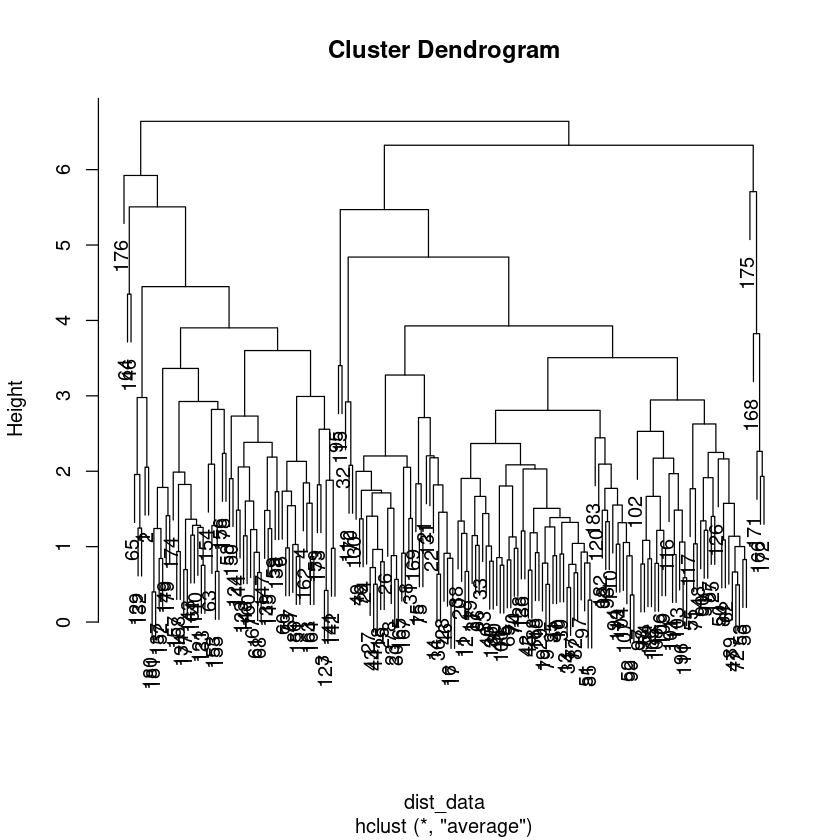

In [80]:
plot(hclust_avg)


In [81]:
new_data <- as.data.frame(lapply(new_data, unlist))


In [82]:
library(factoextra)
fviz_cluster(cluster, data = index_data2)


ERROR: Error in library(factoextra): there is no package called ‘factoextra’
